In [1]:
import sys
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak')
sys.path.append('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/eval')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
from collections import OrderedDict

#from GenerativeSignaler import SignalerZero
#from consistentSignalChecks_Misyak import signalIsConsistent_Boxes

#from misyakConstruction import *

from evaluateMisyak_FullExperimentalConditions import *

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from tqdm import tqdm

In [4]:
humanResults = pd.read_pickle('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/data/humanResultsStrategyPDFs.pkl')

In [5]:
humanResults

humanResults
n_tokens n_axes show_imprints n_bananas strategy              
1        1      0             1         avoid         0.000000
                                        mixed         0.000000
                                        open          1.000000
                                        silent        0.000000
                              2         avoid         0.015625
                                        mixed         0.000000
                                        open          0.984375
                                        silent        0.000000
                1             1         avoid         0.000000
                                        mixed         0.000000
                                        open          1.000000
                                        silent        0.000000
                              2         avoid         0.375000
                                        mixed         0.000000
                                        open          0.625000
                                        silent        0.000000
         2      0             1         avoid         0.015625
                                        mixed         0.000000
                                        open          0.968750
                                        silent        0.015625
                              2         avoid         0.234375
                                        mixed         0.000000
                                        open          0.765625
                                        silent        0.000000
                1             1         avoid         0.000000
                                        mixed         0.000000
                                        open          1.000000
                                        silent        0.000000
                              2         avoid         0.562500
                                        mixed         0.000000
...                                                        ...
2        1      0             1         open          0.968750
                                        silent        0.000000
                              2         avoid         0.000000
                                        mixed         0.046875
                                        open          0.953125
                                        silent        0.000000
                1             1         avoid         0.187500
                                        mixed         0.000000
                                        open          0.812500
                                        silent        0.000000
                              2         avoid         0.000000
                                        mixed         0.000000
                                        open          1.000000
                                        silent        0.000000
         2      0             1         avoid         0.015625
                                        mixed         0.015625
                                        open          0.968750
                                        silent        0.000000
                              2         avoid         0.000000
                                        mixed         0.000000
                                        open          1.000000
                                        silent        0.000000
                1             1         avoid         0.140625
                                        mixed         0.000000
                                        open          0.859375
                                        silent        0.000000
                              2         avoid         0.000000
                                        mixed         0.000000
                                        open          1.000000
                                        silent        0.000000

[64 rows x 1 columns]

# Tuning Variable Grids

In [36]:
manipulatedVariables = OrderedDict()
manipulatedVariables['alpha'] = list(np.linspace(17, 25, 9))
manipulatedVariables['signalTypePriors'] = [.55]
manipulatedVariables['valueOfReward'] = [1.0]
manipulatedVariables['costOfNonReward'] = [0,.5,1.0]
manipulatedVariables['costOfSignal'] = [0.0]

In [38]:
levelNames = list(manipulatedVariables.keys())
levelValues = list(manipulatedVariables.values())
modelIndex = pd.MultiIndex.from_product(levelValues, names=levelNames)
toSplitFrame = pd.DataFrame(index=modelIndex)

computeStatistics =  EvaluateOverloadedSignaler(humanResultsDataFrame=humanResults, 
                                                returnStrategyBreakdown=False,
                                                model = 'IW')
computeConditionStatistics = lambda condition: computeStatistics(condition.index.get_level_values('alpha')[0], 
                                                                 condition.index.get_level_values('valueOfReward')[0],
                                                                 condition.index.get_level_values('signalTypePriors')[0], 
                                                                 condition.index.get_level_values('costOfNonReward')[0], 
                                                                 condition.index.get_level_values('costOfSignal')[0])
errorDF = toSplitFrame.groupby(levelNames).apply(computeConditionStatistics)

alpha 17.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.0
alpha 18.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 18.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.0
alpha 18.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.0
alpha 19.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 19.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.0
alpha 19.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.0
alpha 20.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 20.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.0
alpha 20.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.0
alpha 21.0 rewar

In [37]:
errorDF

,,,,,keyConditionRMSE,keyConditionVariance,totalRMSE,totalVariance
alpha,signalTypePriors,valueOfReward,costOfNonReward,costOfSignal,,,,
10,0.55,1.0,1.0,0.0,0.118384,0.014015,0.300841,0.090505


In [39]:
errorDF.to_pickle("./evalResults-2020-9-2-alpha17-25.pkl")

In [22]:
levelNames = list(manipulatedVariables.keys())
levelValues = list(manipulatedVariables.values())
modelIndex = pd.MultiIndex.from_product(levelValues, names=levelNames)
toSplitFrame = pd.DataFrame(index=modelIndex)

computeStatistics =  EvaluateOverloadedSignaler(humanResultsDataFrame=humanResults, 
                                                returnStrategyBreakdown=False,
                                                model = 'RSA')
computeConditionStatistics = lambda condition: computeStatistics(condition.index.get_level_values('alpha')[0], 
                                                                 condition.index.get_level_values('valueOfReward')[0],
                                                                 condition.index.get_level_values('signalTypePriors')[0], 
                                                                 condition.index.get_level_values('costOfNonReward')[0], 
                                                                 condition.index.get_level_values('costOfSignal')[0])
rsaDF = toSplitFrame.groupby(levelNames).apply(computeConditionStatistics)

alpha 1.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 1.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.1
alpha 1.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.0
alpha 1.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.1
alpha 1.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.0
alpha 1.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.1
alpha 1.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.0 signal cost 0.0
alpha 1.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.0 signal cost 0.1
alpha 1.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.5 signal cost 0.0
alpha 1.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.5 signal cost 0.1
alpha 1.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  1.0 signal cost 0.0
alpha 1.0 reward value 1.0 meaning prio

alpha 2.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.0 signal cost 0.1
alpha 2.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.5 signal cost 0.0
alpha 2.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.5 signal cost 0.1
alpha 2.0 reward value 1.0 meaning prior 0.725 scorpion cost  1.0 signal cost 0.0
alpha 2.0 reward value 1.0 meaning prior 0.725 scorpion cost  1.0 signal cost 0.1
alpha 2.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.0 signal cost 0.0
alpha 2.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.0 signal cost 0.1
alpha 2.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.5 signal cost 0.0
alpha 2.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.5 signal cost 0.1
alpha 2.0 reward value 1.0 meaning prior 0.75 scorpion cost  1.0 signal cost 0.0
alpha 2.0 reward value 1.0 meaning prior 0.75 scorpion cost  1.0 signal cost 0.1
alpha 3.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 3.0 reward value 

alpha 4.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.5 signal cost 0.0
alpha 4.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.5 signal cost 0.1
alpha 4.0 reward value 1.0 meaning prior 0.675 scorpion cost  1.0 signal cost 0.0
alpha 4.0 reward value 1.0 meaning prior 0.675 scorpion cost  1.0 signal cost 0.1
alpha 4.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.0 signal cost 0.0
alpha 4.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.0 signal cost 0.1
alpha 4.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.5 signal cost 0.0
alpha 4.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.5 signal cost 0.1
alpha 4.0 reward value 1.0 meaning prior 0.7 scorpion cost  1.0 signal cost 0.0
alpha 4.0 reward value 1.0 meaning prior 0.7 scorpion cost  1.0 signal cost 0.1
alpha 4.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.0 signal cost 0.0
alpha 4.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.0 signal cost 0.1
alpha 4.0 reward value 1.0 m

alpha 6.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.5 signal cost 0.1
alpha 6.0 reward value 1.0 meaning prior 0.625 scorpion cost  1.0 signal cost 0.0
alpha 6.0 reward value 1.0 meaning prior 0.625 scorpion cost  1.0 signal cost 0.1
alpha 6.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.0 signal cost 0.0
alpha 6.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.0 signal cost 0.1
alpha 6.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.5 signal cost 0.0
alpha 6.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.5 signal cost 0.1
alpha 6.0 reward value 1.0 meaning prior 0.65 scorpion cost  1.0 signal cost 0.0
alpha 6.0 reward value 1.0 meaning prior 0.65 scorpion cost  1.0 signal cost 0.1
alpha 6.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.0 signal cost 0.0
alpha 6.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.0 signal cost 0.1
alpha 6.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.5 signal cost 0.0
alpha 6.0 reward value

alpha 8.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  1.0 signal cost 0.1
alpha 8.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.0 signal cost 0.0
alpha 8.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.0 signal cost 0.1
alpha 8.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.5 signal cost 0.0
alpha 8.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.5 signal cost 0.1
alpha 8.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  1.0 signal cost 0.0
alpha 8.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  1.0 signal cost 0.1
alpha 8.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.0 signal cost 0.0
alpha 8.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.0 signal cost 0.1
alpha 8.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.5 signal cost 0.0
alpha 8.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.5 signal cost 0.1
alpha 8

alpha 10.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.1
alpha 10.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.0
alpha 10.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.5 signal cost 0.1
alpha 10.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.0
alpha 10.0 reward value 1.0 meaning prior 0.55 scorpion cost  1.0 signal cost 0.1
alpha 10.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.0 signal cost 0.0
alpha 10.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.0 signal cost 0.1
alpha 10.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.5 signal cost 0.0
alpha 10.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.5 signal cost 0.1
alpha 10.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  1.0 signal cost 0.0
alpha 10.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  1.0 signal cost 0.1
alpha 10.0 rew

alpha 11.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.0 signal cost 0.1
alpha 11.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.5 signal cost 0.0
alpha 11.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.5 signal cost 0.1
alpha 11.0 reward value 1.0 meaning prior 0.725 scorpion cost  1.0 signal cost 0.0
alpha 11.0 reward value 1.0 meaning prior 0.725 scorpion cost  1.0 signal cost 0.1
alpha 11.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.0 signal cost 0.0
alpha 11.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.0 signal cost 0.1
alpha 11.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.5 signal cost 0.0
alpha 11.0 reward value 1.0 meaning prior 0.75 scorpion cost  0.5 signal cost 0.1
alpha 11.0 reward value 1.0 meaning prior 0.75 scorpion cost  1.0 signal cost 0.0
alpha 11.0 reward value 1.0 meaning prior 0.75 scorpion cost  1.0 signal cost 0.1
alpha 12.0 reward value 1.0 meaning prior 0.55 scorpion cost  0.0 signal cost 0.0
alpha 12.0 

alpha 13.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.0 signal cost 0.1
alpha 13.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.5 signal cost 0.0
alpha 13.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.5 signal cost 0.1
alpha 13.0 reward value 1.0 meaning prior 0.675 scorpion cost  1.0 signal cost 0.0
alpha 13.0 reward value 1.0 meaning prior 0.675 scorpion cost  1.0 signal cost 0.1
alpha 13.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.0 signal cost 0.0
alpha 13.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.0 signal cost 0.1
alpha 13.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.5 signal cost 0.0
alpha 13.0 reward value 1.0 meaning prior 0.7 scorpion cost  0.5 signal cost 0.1
alpha 13.0 reward value 1.0 meaning prior 0.7 scorpion cost  1.0 signal cost 0.0
alpha 13.0 reward value 1.0 meaning prior 0.7 scorpion cost  1.0 signal cost 0.1
alpha 13.0 reward value 1.0 meaning prior 0.725 scorpion cost  0.0 signal cost 0.0
alpha 13.0 rewar

alpha 15.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.0 signal cost 0.1
alpha 15.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.5 signal cost 0.0
alpha 15.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.5 signal cost 0.1
alpha 15.0 reward value 1.0 meaning prior 0.625 scorpion cost  1.0 signal cost 0.0
alpha 15.0 reward value 1.0 meaning prior 0.625 scorpion cost  1.0 signal cost 0.1
alpha 15.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.0 signal cost 0.0
alpha 15.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.0 signal cost 0.1
alpha 15.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.5 signal cost 0.0
alpha 15.0 reward value 1.0 meaning prior 0.65 scorpion cost  0.5 signal cost 0.1
alpha 15.0 reward value 1.0 meaning prior 0.65 scorpion cost  1.0 signal cost 0.0
alpha 15.0 reward value 1.0 meaning prior 0.65 scorpion cost  1.0 signal cost 0.1
alpha 15.0 reward value 1.0 meaning prior 0.675 scorpion cost  0.0 signal cost 0.0
alpha 15.0

alpha 17.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  0.5 signal cost 0.1
alpha 17.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  1.0 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.5750000000000001 scorpion cost  1.0 signal cost 0.1
alpha 17.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.0 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.0 signal cost 0.1
alpha 17.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.5 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  0.5 signal cost 0.1
alpha 17.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  1.0 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.6000000000000001 scorpion cost  1.0 signal cost 0.1
alpha 17.0 reward value 1.0 meaning prior 0.625 scorpion cost  0.0 signal cost 0.0
alpha 17.0 reward value 1.0 meaning prior 0.625 scorp

In [28]:
rsaDF.loc[rsaDF['keyConditionRMSE'] <.10]

keyConditionRMSE  \
alpha signalTypePriors valueOfReward costOfNonReward costOfSignal                     
8.0   0.625            1.0           0.0             0.1                   0.097131   
                                     0.5             0.1                   0.097131   
                                     1.0             0.1                   0.097131   
9.0   0.625            1.0           0.0             0.1                   0.094501   
                                     0.5             0.1                   0.094501   
                                     1.0             0.1                   0.094501   
10.0  0.625            1.0           0.0             0.1                   0.095507   
                                     0.5             0.1                   0.095507   
                                     1.0             0.1                   0.095507   
17.0  0.650            1.0           0.0             0.1                   0.096561   
                                     0.5             0.1                   0.096561   
                                     1.0             0.1                   0.096561   

                                                                   keyConditionVariance  \
alpha signalTypePriors valueOfReward costOfNonReward costOfSignal                         
8.0   0.625            1.0           0.0             0.1                       0.009434   
                                     0.5             0.1                       0.009434   
                                     1.0             0.1                       0.009434   
9.0   0.625            1.0           0.0             0.1                       0.008930   
                                     0.5             0.1                       0.008930   
                                     1.0             0.1                       0.008930   
10.0  0.625            1.0           0.0             0.1                       0.009122   
                                     0.5             0.1                       0.009122   
                                     1.0             0.1                       0.009122   
17.0  0.650            1.0           0.0             0.1                       0.009324   
                                     0.5             0.1                       0.009324   
                                     1.0             0.1                       0.009324   

                                                                   totalRMSE  \
alpha signalTypePriors valueOfReward costOfNonReward costOfSignal              
8.0   0.625            1.0           0.0             0.1            0.217150   
                                     0.5             0.1            0.217150   
                                     1.0             0.1            0.217150   
9.0   0.625            1.0           0.0             0.1            0.218825   
                                     0.5             0.1            0.218825   
                                     1.0             0.1            0.218825   
10.0  0.625            1.0           0.0             0.1            0.221502   
                                     0.5             0.1            0.221502   
                                     1.0             0.1            0.221502   
17.0  0.650            1.0           0.0             0.1            0.218008   
                                     0.5             0.1            0.218008   
                                     1.0             0.1            0.218008   

                                                                   totalVariance  
alpha signalTypePriors valueOfReward costOfNonReward costOfSignal                 
8.0   0.625            1.0           0.0             0.1                0.047154  
                                     0.5             0.1                0.047154  
                                     1.0             0.1                0.047154  
9.0   0.625            1.0           

In [ ]:
print(errorDF.loc[errorDF['totalRMSE'] >.65].index.get_level_values('costOfNonReward')[0:100])

In [ ]:
errorDF.loc[errorDF['keyConditionRMSE'] < .13]

In [25]:
rsaDF.to_pickle("./evalResults-2020-9-1-RSA.pkl")

# Read in Saved Evaluation Results (no need to rerun eval)

In [ ]:
modelTuning = pd.read_pickle('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/data/modelingErrors_LargeGrid.pkl')
modelingResults_OptimalCondition = pd.read_pickle('/home/stacyste/Documents/Research/OverloadedSignaling/Environments/Misyak/data/modelingPredictions_Optimal.pkl')

# Closer Look at Optimal Parameters (Derived from Grid Search)

In [ ]:
# parameters
alpha = 2
reward = 5
prior = {'1':.5, '-1':.5}

In [ ]:
getModelingResults =  EvaluateOverloadedSignaler(humanResults, returnStrategyBreakdown = True)
modelPredictions = getModelingResults(alpha, reward, signalMeaningPrior=.5, costOfSignal = 0.1, costOfPunishment = -0.5)

In [ ]:
modelPredictions

In [ ]:
getTrial = SetupMisyakTrial(alpha, reward, prior)
condition = (2, 2, 1, 2) #n_tokens, n_axes, show_imprints, n_bananas
getModelingResults.getSignalPDF(condition, getTrial)

## RSA

In [29]:
# optimized for overarching error (smallish grid search)
alpha_total = 9
reward_total = 1
prior_total = {'1':.625, '-1':.375}

In [30]:
getRSAStrategies =  EvaluateOverloadedSignaler(humanResults, returnStrategyBreakdown = True, model='RSA')
modePredsRSA = getRSAStrategies(alpha_total, 
                                reward_total, 
                                signalMeaningPrior=.625, 
                                costOfSignal = 0.0, 
                                costOfPunishment = 0.0)

In [31]:
modePredsRSA

humanResults  modelResults
n_tokens n_axes show_imprints n_bananas strategy                            
1        1      0             1         avoid         0.000000      0.000522
                                        mixed         0.000000      0.000000
                                        open          1.000000      0.996252
                                        silent        0.000000      0.003226
                              2         avoid         0.015625      0.158910
                                        mixed         0.000000      0.000000
                                        open          0.984375      0.820347
                                        silent        0.000000      0.020743
                1             1         avoid         0.000000      0.000519
                                        mixed         0.000000      0.000000
                                        open          1.000000      0.989509
                                        silent        0.000000      0.009972
                              2         avoid         0.375000      0.123996
                                        mixed         0.000000      0.000000
                                        open          0.625000      0.640111
                                        silent        0.000000      0.235893
         2      0             1         avoid         0.015625      0.000522
                                        mixed         0.000000      0.000000
                                        open          0.968750      0.996252
                                        silent        0.015625      0.003226
                              2         avoid         0.234375      0.158910
                                        mixed         0.000000      0.000000
                                        open          0.765625      0.820347
                                        silent        0.000000      0.020743
                1             1         avoid         0.000000      0.000519
                                        mixed         0.000000      0.000000
                                        open          1.000000      0.989509
                                        silent        0.000000      0.009972
                              2         avoid         0.562500      0.123996
                                        mixed         0.000000      0.000000
...                                                        ...           ...
2        1      0             1         open          0.968750      0.772598
                                        silent        0.000000      0.000457
                              2         avoid         0.000000      0.000346
                                        mixed         0.046875      0.000000
                                        open          0.953125      0.999650
                                        silent        0.000000      0.000005
                1             1         avoid         0.187500      0.985607
                                        mixed         0.000000      0.000000
                                        open          0.812500      0.014342
                                        silent        0.000000      0.000050
                              2         avoid         0.000000      0.000147
                                        mixed         0.000000      0.000000
                                        open          1.000000      0.999803
                                        silent        0.000000      0.000051
         2      0             1         avoid         0.015625      0.226944
                                        mixed         0.015625      0.000000
                                        open          0.968750      0.772598
                                        silent        0.000000      0.000457
                              2         avoid         0.000000      0.000346
                                        mixed 

## Example Trial Evaluation

In [ ]:
# optimal based on large grid search - optimized for key condition error
alpha = 3.5
reward = 10
prior = {'1':.57, '-1':.43}

getTrial = SetupMisyakTrial(alpha, reward, prior)
getEvaluation = EvaluateOverloadedSignaler(humanResults)

In [ ]:
condition = (2, 2, 1, 2) #n_tokens, n_axes, show_imprints, n_bananas
getEvaluation.getSignalPDF(condition, getTrial)

# Plotting

In [32]:
#plotting hyperparameters
figureSize = (25,18)
horizontalSpaceBetweenSubplots = .45
legendColors = {'avoid' : 'thistle', 'open':'royalblue' ,'silent':'gold','mixed':'lightsalmon'}
hatch = {'twoToken':'n', 'twoToken_goto':'//','inversion':'n','inversion_goto':'//', 'wall':'n','wall_goto':'//', 'oneAx':'n', 'oneAx_goto':'//'}

In [33]:
#dataframe to plot
dataframeName = modePredsRSA
dataFrameRowLength = 4
dataFrameColLength = 4

## Draw Single Plot

In [34]:
def drawPerformanceBarPlot(dfCondition,  axForDraw, nConditions = 4, hatches = None, barWidth = .35):
    N = nConditions
    ind = np.arange(N)  # the x locations for the groups
    width = barWidth      # the width of the bars
    #mpl.rcParams['hatch.color'] = 'grey'
    
    labels = dfCondition.columns
    avoid = dfCondition.loc['avoid']
    openCondition = dfCondition.loc['open']
    silent = dfCondition.loc['silent']
    mixed = dfCondition.loc['mixed']
    
    cols = ['thistle','thistle','royalblue', 'royalblue','gold', 'gold','lightsalmon', 'lightsalmon']
    hatchPattern = ['n', '//', 'n', '//', 'n', '//', 'n','//']

    axForDraw.bar(labels, openCondition, width, label='Open', color = 'royalblue')
    axForDraw.bar(labels, avoid, width, bottom = openCondition, label='Avoid', color = 'thistle')
    axForDraw.bar(labels, silent, width, bottom=openCondition+avoid, label='Silent', color = 'gold')
    axForDraw.bar(labels, mixed, width, bottom=openCondition+avoid+silent, label='Mixed', color = 'lightsalmon')
    
    axForDraw.set_yticks([0,.5,1])
    axForDraw.set_xticks([])

## Plot Grid

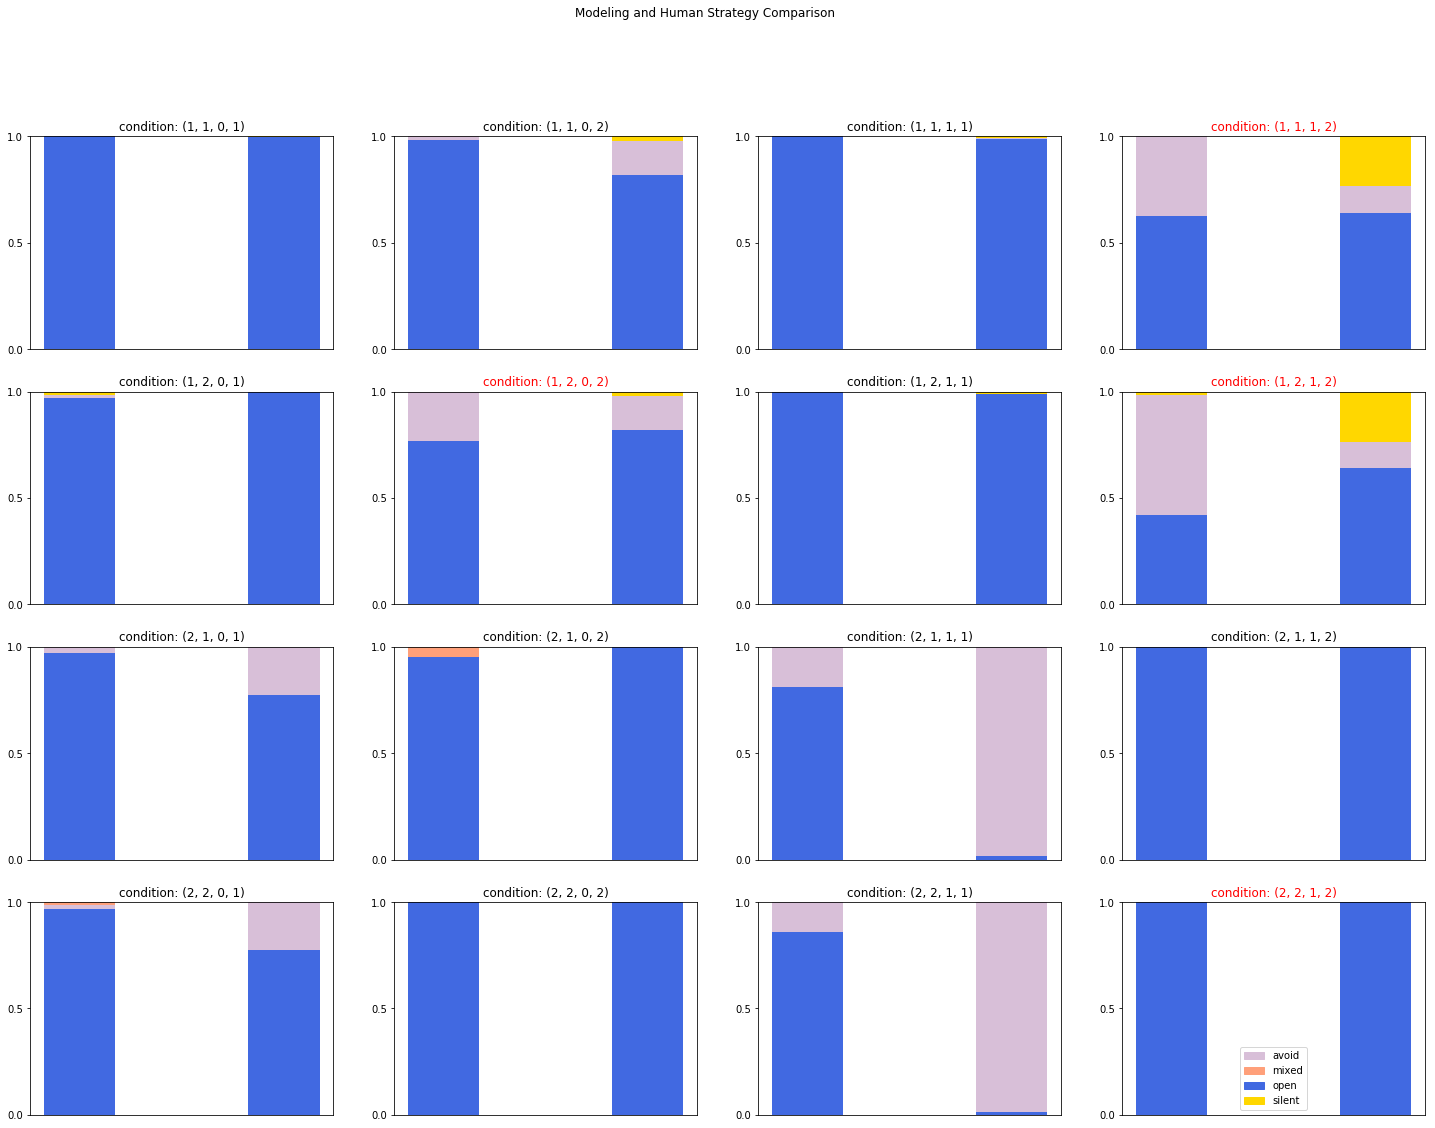

In [35]:
fig = plt.figure(figsize=figureSize)
numRows = dataFrameRowLength
numColumns = dataFrameColLength
plotCounter = 1

for condition, grp in dataframeName.groupby(['n_tokens','n_axes','show_imprints','n_bananas']):
    grp.index = grp.index.droplevel(['n_tokens','n_axes','show_imprints','n_bananas'])
    #for signalTypePriors, group in grp.groupby('signalTypePriors'):

    keyConditions = [(2,2,1,2),(1,2,1,2),(1,1,1,2),(1,2,0,2)]
    #subplot axis labels
    axForDraw = fig.add_subplot(numRows, numColumns, plotCounter)
    axForDraw.set_title('condition: {}'.format(condition))
    if condition in keyConditions:
        axForDraw.set_title('condition: {}'.format(condition), color = 'red')
    axForDraw.set_ylim(0, 1)

    #draw subplot
    drawPerformanceBarPlot(grp, axForDraw, 2)

    plotCounter += 1

#Title
plt.suptitle('Modeling and Human Strategy Comparison')

#legend
legend_dict = legendColors
patchList = []
trialList = ["avoid", 'mixed', 'open', 'silent']
for key in trialList:
    data_key = mpatches.Patch(color=legend_dict[key], label=key)
    patchList.append(data_key)
plt.legend(handles=patchList, loc='best')

#adjust horizontal spacing of subplots
fig.subplots_adjust(wspace=.2)

plt.show()